# Machine Learning
## Aditya Gavankar (J072)

## Test:- M2
## Competition:- 5

### Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [36]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1144,33,Government Sector,Yes,800000,5,1,No,No,0
1,1213,28,Private Sector/Self Employed,Yes,1100000,4,1,Yes,No,0
2,1138,27,Government Sector,Yes,500000,4,0,No,No,0
3,1329,28,Private Sector/Self Employed,Yes,550000,4,0,Yes,No,0
4,1446,33,Private Sector/Self Employed,Yes,550000,7,1,Yes,No,1


In [37]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0,27,Government Sector,Yes,500000,5,0,No,No
1,9,34,Private Sector/Self Employed,Yes,1050000,4,0,No,No
2,14,29,Private Sector/Self Employed,Yes,1200000,4,0,No,No
3,31,25,Private Sector/Self Employed,Yes,1400000,7,0,No,Yes
4,41,31,Private Sector/Self Employed,Yes,1400000,6,0,No,Yes


### Encoding the categorical data

In [38]:
employ_num = {'Government Sector': 0, 'Private Sector/Self Employed': 1}
grad_num = {'No': 0, 'Yes': 1}
flyer_num = {'No': 0, 'Yes': 1}
abroad_num = {'No': 0, 'Yes': 1}

train_df['Employment Type'] = train_df['Employment Type'].map(employ_num)
train_df['GraduateOrNot'] = train_df['GraduateOrNot'].map(grad_num)
train_df['FrequentFlyer'] = train_df['FrequentFlyer'].map(flyer_num)
train_df['EverTravelledAbroad'] = train_df['EverTravelledAbroad'].map(abroad_num)

train_df.head()

,id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1144,33,0,1,800000,5,1,0,0,0
1,1213,28,1,1,1100000,4,1,1,0,0
2,1138,27,0,1,500000,4,0,0,0,0
3,1329,28,1,1,550000,4,0,1,0,0
4,1446,33,1,1,550000,7,1,1,0,1


### Random Oversampling of the minority class

In [39]:
train_df['TravelInsurance'].value_counts()

0    1014
1     576
Name: TravelInsurance, dtype: int64

Here, our aim is to make the class ratio (1:1) for random oversampling.\
Therefore, (1014 - 576) = 438 more samples needed for the minority i.e., class 1.

In [40]:
train = train_df.iloc[:, 1:].copy(deep = True)
train.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,33,0,1,800000,5,1,0,0,0
1,28,1,1,1100000,4,1,1,0,0
2,27,0,1,500000,4,0,0,0,0
3,28,1,1,550000,4,0,1,0,0
4,33,1,1,550000,7,1,1,0,1


In [41]:
train_new = pd.DataFrame(index = range(0,2028), columns = train.columns)
train_new.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
import random
random.seed(41)

minority_indices = list(train[train['TravelInsurance'] == 1].index)
oversampled_indices = random.choices(minority_indices, k = 438)
train_new.iloc[:1590,:] = train.iloc[:,:].copy(deep = True)

x = 0
for i in range(1590, 2028):
    train_new.iloc[i,:] = train.iloc[oversampled_indices[x],:]
    x = x + 1

train_new['TravelInsurance'].value_counts()

1    1014
0    1014
Name: TravelInsurance, dtype: int64

In [43]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  2028 non-null   object
 1   Employment Type      2028 non-null   object
 2   GraduateOrNot        2028 non-null   object
 3   AnnualIncome         2028 non-null   object
 4   FamilyMembers        2028 non-null   object
 5   ChronicDiseases      2028 non-null   object
 6   FrequentFlyer        2028 non-null   object
 7   EverTravelledAbroad  2028 non-null   object
 8   TravelInsurance      2028 non-null   object
dtypes: object(9)
memory usage: 142.7+ KB


In [44]:
for column in train_new.columns[:]:
    train_new[column] = train_new[column].astype(dtype = 'int64')

train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  2028 non-null   int64
 1   Employment Type      2028 non-null   int64
 2   GraduateOrNot        2028 non-null   int64
 3   AnnualIncome         2028 non-null   int64
 4   FamilyMembers        2028 non-null   int64
 5   ChronicDiseases      2028 non-null   int64
 6   FrequentFlyer        2028 non-null   int64
 7   EverTravelledAbroad  2028 non-null   int64
 8   TravelInsurance      2028 non-null   int64
dtypes: int64(9)
memory usage: 142.7 KB


### Data cleaning

In [45]:
train_new.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

<AxesSubplot:>

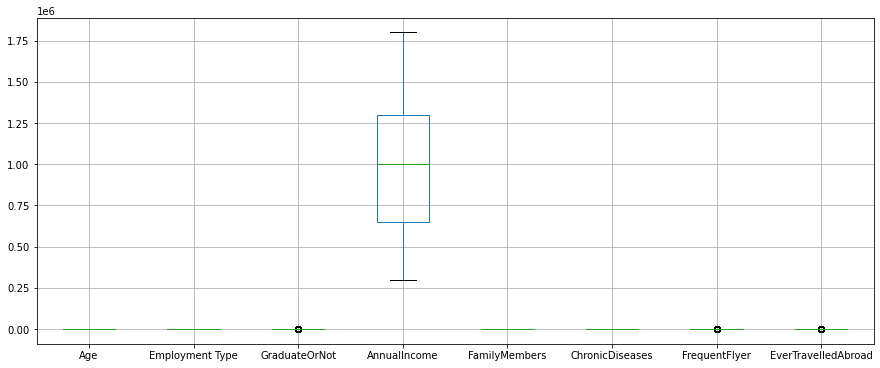

In [46]:
plt.figure(figsize=(15,6))
train_new.iloc[:,:-1].boxplot(vert=1)

Here, we have 3 columns with outliers. \
Therefore, we cap the outliers on the higher side to Q3 + (1.5 * IQR) \
                      and those on the lower side to Q1 - (1.5 * IQR)


In [47]:
for col in train_new.columns[:-1]:
    q1 = train_new[col].describe()['25%']
    q3 = train_new[col].describe()['75%']
    iqr = q3 - q1
    high_value = q3 + (1.5 * iqr)
    low_value = q1 - (1.5 * iqr)
    train_new[col] = np.where(train_new[col] > high_value, high_value, train_new[col])
    train_new[col] = np.where(train_new[col] < low_value, low_value, train_new[col])

<AxesSubplot:>

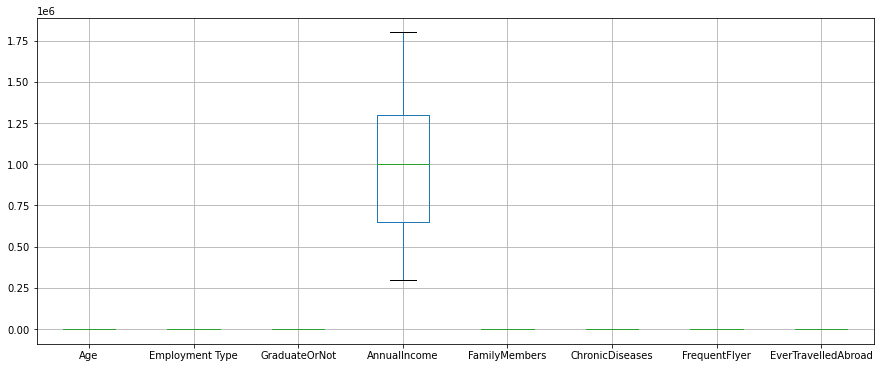

In [48]:
plt.figure(figsize=(15,6))
train_new.iloc[:,:-1].boxplot(vert=1)

### Cross Validation and Model Building (KNN)

In [49]:
train_new['kfold'] = -1
train_new = train_new.sample(frac = 1, random_state = 100).reset_index(drop = True)
y = train_new['TravelInsurance'].values

In [50]:
from sklearn import model_selection

skf = model_selection.StratifiedKFold(n_splits = 5)
for f, (t_ , v_) in enumerate(skf.split(X = train_new , y = y)) :
    train_new.loc[v_ , 'kfold'] = f
    
train_new.kfold.value_counts()

2    406
1    406
0    406
4    405
3    405
Name: kfold, dtype: int64

### Training the model

In [51]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=8)

In [52]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [53]:
fold_num = 1
train_auc_scores = []
val_auc_scores = []


for kfold_idx in train_new['kfold'].value_counts().index:
    print(f"K-Fold: {fold_num}")
    
    X_train = train_new[train_new['kfold'] != kfold_idx].iloc[:, :-2].values
    X_train = std.fit_transform(X_train)
    y_train = train_new[train_new['kfold'] != kfold_idx].iloc[:, -2].values
    
    X_val = train_new[train_new['kfold'] == kfold_idx].iloc[:, :-2].values
    X_val = std.fit_transform(X_val)
    y_val = train_new[train_new['kfold'] == kfold_idx].iloc[:, -2].values
    
    model.fit(X_train, y_train)
    preds_train = model.predict_proba(X_train)[:,1]
    preds_val = model.predict_proba(X_val)[:,1]
    
    train_auc_scores.append(roc_auc_score(y_true = y_train, y_score = preds_train))
    val_auc_scores.append(roc_auc_score(y_true = y_val, y_score = preds_val))
    
    print(f"AUC scores in Train: {train_auc_scores[-1]}")
    print(f"AUC scores in Validation: {val_auc_scores[-1]}")
    print("\n")
    fold_num = fold_num + 1


print(f"Mean AUC(Train set): {np.mean(train_auc_scores)}")
print(f"Mean AUC(Validation set): {np.mean(val_auc_scores)}")

K-Fold: 1
AUC scores in Train: 0.892443756547229
AUC scores in Validation: 0.7632434662331045


K-Fold: 2
AUC scores in Train: 0.8936159861096118
AUC scores in Validation: 0.7969496954548765


K-Fold: 3
AUC scores in Train: 0.8810232606226652
AUC scores in Validation: 0.8337863088160353


K-Fold: 4
AUC scores in Train: 0.8828264989400668
AUC scores in Validation: 0.8343291225674291


K-Fold: 5
AUC scores in Train: 0.8896606391185242
AUC scores in Validation: 0.7910915475784033


Mean AUC(Train set): 0.8879140282676193
Mean AUC(Validation set): 0.8038800281299696


### Predicting the best model

In [54]:
k_fold_idx = 2
X_train = train_new[train_new['kfold'] != k_fold_idx].iloc[:, :-2].values
X_train = std.fit_transform(X_train)

X_val = train_new[train_new['kfold'] == k_fold_idx].iloc[:, :-2].values
X_val = std.fit_transform(X_val)

y_train = train_new[train_new['kfold'] != k_fold_idx].iloc[:, -2].values

y_val = train_new[train_new['kfold'] == k_fold_idx].iloc[:, -2].values

In [55]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

### Standardizing and predicting the Test dataset

In [56]:
test_df.head()

,id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0,27,Government Sector,Yes,500000,5,0,No,No
1,9,34,Private Sector/Self Employed,Yes,1050000,4,0,No,No
2,14,29,Private Sector/Self Employed,Yes,1200000,4,0,No,No
3,31,25,Private Sector/Self Employed,Yes,1400000,7,0,No,Yes
4,41,31,Private Sector/Self Employed,Yes,1400000,6,0,No,Yes


In [57]:
#Data cleaning
test_df.isnull().sum()

id                     0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
dtype: int64

In [58]:
#Encoding the categorical values
employ_num = {'Government Sector': 0, 'Private Sector/Self Employed': 1}
grad_num = {'No': 0, 'Yes': 1}
flyer_num = {'No': 0, 'Yes': 1}
abroad_num = {'No': 0, 'Yes': 1}

test_df['Employment Type'] = test_df['Employment Type'].map(employ_num)
test_df['GraduateOrNot'] = test_df['GraduateOrNot'].map(grad_num)
test_df['FrequentFlyer'] = test_df['FrequentFlyer'].map(flyer_num)
test_df['EverTravelledAbroad'] = test_df['EverTravelledAbroad'].map(abroad_num)

test_df.head()

,id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0,27,0,1,500000,5,0,0,0
1,9,34,1,1,1050000,4,0,0,0
2,14,29,1,1,1200000,4,0,0,0
3,31,25,1,1,1400000,7,0,0,1
4,41,31,1,1,1400000,6,0,0,1


In [59]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   id                   397 non-null    int64
 1   Age                  397 non-null    int64
 2   Employment Type      397 non-null    int64
 3   GraduateOrNot        397 non-null    int64
 4   AnnualIncome         397 non-null    int64
 5   FamilyMembers        397 non-null    int64
 6   ChronicDiseases      397 non-null    int64
 7   FrequentFlyer        397 non-null    int64
 8   EverTravelledAbroad  397 non-null    int64
dtypes: int64(9)
memory usage: 28.0 KB


In [60]:
X_test = test_df.iloc[:,1:]
X_test = std.fit_transform(X_test)

In [61]:
pred = model.predict_proba(X_test)[:,1]

### Converting into CSV file

In [62]:
sub = pd.read_csv('test.csv')
cols =['Age','Employment Type',
       'GraduateOrNot','AnnualIncome',
       'FamilyMembers','ChronicDiseases',
       'FrequentFlyer','EverTravelledAbroad']

sub = sub.drop(columns=cols, axis=1)
sub['TravelInsurance'] = pred

In [63]:
sub.to_csv('J072_ML_M2-Test_5_AUC.csv', index=False)